# Personal Finance Advisor Agent (GenAI Capstone) 📈

This project presents a **GenAI-powered personal finance advisor** that provides real-time stock insights and investment recommendations (**BUY / HOLD / SELL**) based on current market data and news.

The system leverages a single large language model (Gemini) and demonstrates **five core GenAI capabilities**:

1. **Function Calling to Real-Time Stock Data** – The model dynamically retrieves live stock information using a custom function powered by the `yfinance` package.
2. **Few-shot Prompting for Stock Trend Analysis** – The model is guided by curated prompt examples that define its reasoning style and expected output.
3. **Structured Output / JSON Mode** – The model generates recommendations in a strict JSON format, making them easy to parse and log automatically.
3. **Summarize Each Recent Stock News Article** - Gemini summarizes individual news articles into 2–3 key investor-relevant insights using document understanding.
5. **Document Understanding with Multi-Source Reasoning** – The model summarizes recent news articles and combines them with structured stock data to generate holistic investment insights and recommendations.

This end-to-end pipeline demonstrates how GenAI can power real-world finance agents by integrating external data access, prompt engineering, and structured reasoning. This showcases how GenAI can act as a practical, intelligent advisor for personal finance — integrating structured data, external content, and reasoning into a single unified experience.

## GenAI Personal Finance Advisor Workflow

This circular flowchart illustrates the end-to-end pipeline of the GenAI-powered finance advisor. From user input to real-time stock and news retrieval, visualization, analysis with Gemini, and result presentation—each component forms a continuous feedback loop to support dynamic, data-driven investment decision-making.

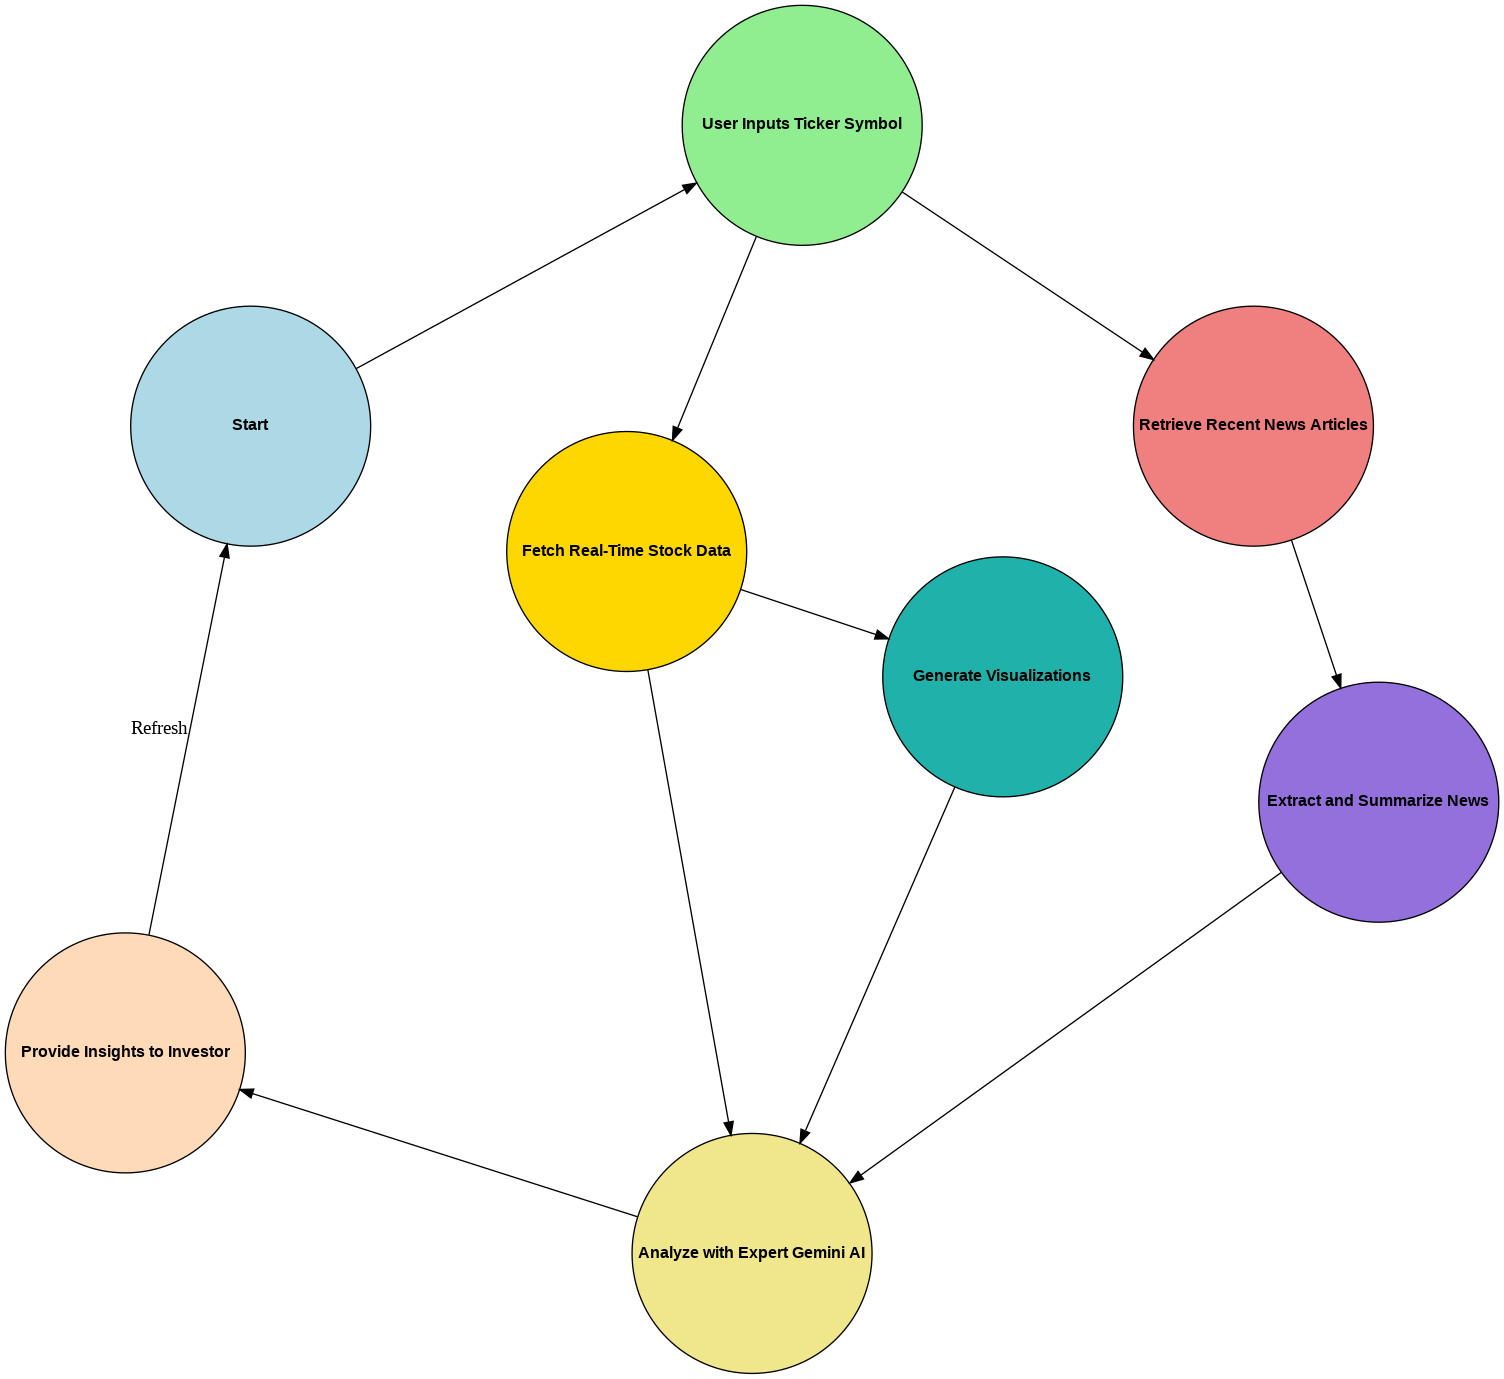

In [1]:
from graphviz import Digraph
from IPython.display import Image

# Use 'neato' engine for circular positioning
dot = Digraph(
    engine='neato',
    comment='GenAI Personal Finance Advisor Workflow (Circular)',
    graph_attr={
        'overlap': 'false',
        'splines': 'true',
        'fontname': 'Arial',
    },
    node_attr={
        'fontsize': '12',
        'fontname': 'Arial Bold',
        'shape': 'circle',
        'fixedsize': 'true',
        'width': '2.5',
        'height': '2.5'
    }
)

# Define circular positions for each node
positions = {
    'A': ('1', '2'),  # Start
    'B': ('3.2', '3.2'),
    'C': ('2.5', '1.5'),
    'D': ('5', '2'),
    'E': ('5.5', '0.5'),
    'F': ('4', '1'),
    'G': ('3', '-1.3'),
    'H': ('0.5', '-0.5')
}

# Define labels for each node
labels = {
    'A': 'Start',
    'B': 'User Inputs Ticker Symbol',
    'C': 'Fetch Real-Time Stock Data',
    'D': 'Retrieve Recent News Articles',
    'E': 'Extract and Summarize News',
    'F': 'Generate Visualizations',
    'G': 'Analyze with Expert Gemini AI',
    'H': 'Provide Insights to Investor'
}

# Define custom colors for each node
colors = {
    'A': 'lightblue',
    'B': 'lightgreen',
    'C': 'gold',
    'D': 'lightcoral',
    'E': 'mediumpurple',
    'F': 'lightseagreen',
    'G': 'khaki',
    'H': 'peachpuff'
}

# Add nodes with positions, colors, and styles
for node, (x, y) in positions.items():
    dot.node(
        node,
        labels[node],
        pos=f"{x},{y}!",
        style='filled',
        fillcolor=colors.get(node, 'white')
    )

# Define the directed edges in a loop
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('B', 'D')
dot.edge('C', 'F')
dot.edge('C', 'G')
dot.edge('D', 'E')
dot.edge('E', 'G')
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'A', label='Refresh')

# Render and show image
dot.render('genai_workflow_circular', format='png', cleanup=True)
Image(filename='genai_workflow_circular.png')

# Imports & Setup

In [2]:
#!pip uninstall -qqy jupyterlab
!pip install -U -q "google-genai==1.7.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 4.5 MB/s eta 0:00:00


In [3]:
!pip install newspaper3k
!pip install lxml_html_clean

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 61.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 5.9 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13539 sha256=7e196546390489eeee41dd63583087ff1081ed5c8e7adf01670d478e19d12039
  Stored in directory: /root/.cache/pip/wheels/fc/ab/f8/cce3a9ae6d828bd346be695f7ff54612cd22b7cbd7208d68f3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=ee722db3df188cb9c53d1aea848ef852645b7cb5f104cb5cfaca10332bdaf6c1
  Stored in directory: /root/.cache/pip/wheels/80/d5/72/9cd9eccc819636436c6a6e59c22a0fb1ec

In [4]:
!pip uninstall -y yfinance
!pip install yfinance

Found existing installation: yfinance 0.2.52
Uninstalling yfinance-0.2.52:
  Successfully uninstalled yfinance-0.2.52
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 3.2 MB/s eta 0:00:00


In [5]:
!pip install --upgrade google-cloud-secret-manager
!pip install alpha_vantage
!pip install google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 5.7 MB/s eta 0:00:00


In [6]:
from google import genai
from google.genai import types
from IPython.display import HTML, Markdown, display

genai.__version__

'1.7.0'

In [7]:
from kaggle_secrets import UserSecretsClient
import yfinance as yf
import json
import os
from google import genai
from google.genai import types
import pandas as pd
from datetime import datetime
import os

from google.cloud.secretmanager import SecretManagerServiceClient
client = SecretManagerServiceClient()
GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

client = genai.Client(api_key=GOOGLE_API_KEY)

In [8]:
# Available models
for model in client.models.list():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
m

# GenAI Capability 1: Function Calling to Real-Time Stock

In this project, the LLM (Gemini) uses a custom function `get_stock_info(ticker)` to fetch real-time stock data based on user queries.

This demonstrates **Function Calling** by:
- Dynamically retrieving up-to-date stock prices and trends
- Passing the results into the LLM's prompt for reasoning
- Allowing the agent to adapt based on external, real-world inputs

This decouples the model’s logic from hardcoded examples, and reflects real-world GenAI tool use cases.

## Understanding Key Financial Metrics

Below is a description of the financial metrics used in this notebook and why they matter for investment decisions:

- **Current Price:**  
  The most recent trading price of the stock. Serves as a reference for valuation comparisons and market movement.

- **52-Week High / Low:**  
  The highest and lowest prices over the past year. Useful for identifying potential upside and downside risks.

- **Day High / Low:**  
  The range of prices within the current trading day, showing intraday volatility.

- **Volume:**  
  Total number of shares traded today. Higher volume reflects stronger market interest and liquidity.

- **Market Cap:**  
  The company’s total market value (shares × price). Indicates the size and maturity of the business.

- **Sector:**  
  The industry classification of the company. Helps investors diversify across market sectors and manage exposure.

- **P/E Ratio (Price-to-Earnings):**  
  Shows how much investors are paying for each dollar of earnings. High values may indicate high expectations or overvaluation.

- **Dividend Yield:**  
  The annual dividend as a percentage of the stock price. Important for income-seeking investors.

- **Beta:**  
  A measure of volatility. A beta > 1 means the stock is more volatile than the market; < 1 indicates more stability.

- **50-Day & 200-Day Averages:**  
  Moving averages help identify market trends. A stock trading above these averages is generally seen as bullish.

- **Price-to-Book Ratio (P/B):**  
  Compares market price to book value. Higher ratios suggest growth expectations; lower may signal undervaluation.

- **Earnings Per Share (EPS):**  
  Indicates company profitability. Higher EPS is typically favorable and suggests strong performance.

- **YTD Return:**  
  The stock’s return since the start of the year. Useful for evaluating performance against market benchmarks.

- **Recent Trend:**  
  A 7-day snapshot of closing prices. Helpful for detecting short-term momentum and price direction.

In [9]:
import yfinance as yf

def extract_sector(info):
    # Use standard sector if available (for stocks)
    if "sector" in info and info["sector"]:
        return info["sector"]

    # Otherwise, try to classify ETF more descriptively
    if str(info.get("quoteType", "")).lower() == "etf":
        category = info.get("category", "ETF")
        family = info.get("fundFamily", "")
        return f"{family} ({category})" if family else f"Exchange-Traded Fund ({category})"

    return None

def get_stock_info(ticker: str):
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="1y")
        info = stock.info

        return {
            "ticker": ticker,
            "current_price": info.get("currentPrice") or info.get("regularMarketPrice"),
            "52_week_high": info.get("fiftyTwoWeekHigh"),
            "52_week_low": info.get("fiftyTwoWeekLow"),
            "day_high": info.get("dayHigh"),
            "day_low": info.get("dayLow"),
            "volume": info.get("volume"),
            "market_cap": info.get("marketCap"),
            "sector": extract_sector(info),
            "pe_ratio": info.get("trailingPE"),
            "dividend_yield": info.get("dividendYield"),
            "beta": info.get("beta"),
            "fifty_day_avg": info.get("fiftyDayAverage"),
            "two_hundred_day_avg": info.get("twoHundredDayAverage"),
            "price_to_book": info.get("priceToBook"),
            "eps": info.get("epsTrailingTwelveMonths"),
            "ytd_return": info.get("ytdReturn"),
            "recent_trend": hist["Close"][-7:].round(2).tolist()
        }
    except Exception as e:
        print(f"Error fetching stock info for {ticker}: {e}")
        return {"ticker": ticker, "error": str(e)}

# GenAI Capability 2: Few-shot Prompt for Stock Trend Analysis

This project uses **few-shot prompting** to guide the behavior of the language model. In the prompt, we include two manually designed examples that show how the model should analyze stock data and output structured recommendations.

By providing these examples, we demonstrate to the model the expected reasoning process and output format. This allows the model to generalize its behavior for new ticker inputs, even though it has not seen those specific stocks before.

This few-shot technique enables more accurate and controllable outputs without fine-tuning the model.

In [10]:
#Few-shot prompt

few_shot_prompt = """
You are a financial advisor AI. Based on stock data, suggest one of the following actions: BUY, HOLD, or SELL.
Respond in JSON format with: recommendation, reason, and confidence.

Consider the following indicators in your decision:
- current_price: today's trading price
- 52_week_high / 52_week_low: price extremes over the last year
- recent_trend: last 7 days of closing prices
- dividend_yield: annual income return as a percent of price
- beta: volatility compared to the market (1 = market average)
- fifty_day_avg / two_hundred_day_avg: momentum indicators
- pe_ratio: valuation relative to earnings (high = expensive)
- price_to_book: valuation based on net assets
- eps: earnings per share, a profitability measure
- ytd_return: performance so far this year

Example 1:
Input:
{
  "ticker": "AAPL",
  "current_price": 180,
  "52_week_high": 200,
  "52_week_low": 140,
  "dividend_yield": 0.006,
  "beta": 1.2,
  "fifty_day_avg": 175,
  "two_hundred_day_avg": 165,
  "pe_ratio": 28,
  "price_to_book": 8.5,
  "eps": 6.2,
  "ytd_return": 0.12,
  "recent_trend": [175, 178, 179, 180, 180, 179, 180]
}
Output:
{
  "recommendation": "HOLD",
  "reason": "The price is near its 52-week high with stable short-term performance. While momentum is positive, it appears fully valued based on P/E and P/B ratios.",
  "confidence": "Medium"
}

Example 2:
Input:
{
  "ticker": "TSLA",
  "current_price": 150,
  "52_week_high": 220,
  "52_week_low": 120,
  "dividend_yield": 0.0,
  "beta": 1.8,
  "fifty_day_avg": 140,
  "two_hundred_day_avg": 135,
  "pe_ratio": 35,
  "price_to_book": 12,
  "eps": 4.5,
  "ytd_return": 0.18,
  "recent_trend": [135, 140, 145, 148, 149, 150, 151]
}
Output:
{
  "recommendation": "BUY",
  "reason": "Strong momentum above both moving averages and improving trend. Though valuation is high, growth expectations support a buy.",
  "confidence": "High"
}

Now analyze:
Input:
{input_data}

Expected Output Format:
recommendation: BUY | HOLD | SELL
confidence: Low | Medium | High
reason: ...
"""

# GenAI Capability 3: Structured Output / JSON Mod

The language model is instructed to return its final recommendation in a strict **JSON format**, containing three fields: `recommendation`, `reason`, and `confidence`.

This demonstrates the GenAI capability of **controlled generation**, where the model’s output is formatted to support downstream processing. By ensuring the output adheres to a predictable structure, we can easily parse the model’s response programmatically and render it as a user-facing summary or dashboard.

This kind of structured output is critical for building AI assistants that integrate smoothly with apps, APIs, or UIs.

In [11]:
def get_stock_recommendation(stock_data):
    prompt = few_shot_prompt.replace("{input_data}", json.dumps(stock_data))

    response = client.models.generate_content(
    model='gemini-2.0-flash', ##gemini-2.5-pro-exp-03-25 gemini-2.0-flash gemini-1.5-flash
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
    ),
    contents=prompt)

    output = response.text
    return json.loads(output)

In [12]:
def reorder_columns_for_excel(data: dict):
    # First priority columns
    priority = ["date", "ticker", "current_price", "recommendation", "confidence", "reason"]
    
    # Any remaining columns
    remaining = [k for k in data.keys() if k not in priority]

    # Reordered dictionary
    ordered = {k: data.get(k) for k in priority + remaining}
    return ordered


def log_stock_recommendation(ticker="GOOG", excel_path="stock_recommendations_log.xlsx"):
    print(f"Fetching stock info for {ticker}...")
    stock_data = get_stock_info(ticker)

    print("\nStock data:")
    print(json.dumps(stock_data, indent=2))

    recommendation = get_stock_recommendation(stock_data)

    markdown_output = f"""
**Recommendation:** {recommendation['recommendation']}  
**Confidence:** {recommendation['confidence']}  
**Reason:** {recommendation['reason']}
"""
    
    display(Markdown(markdown_output))
   
    # Add timestamp and AI recommendation to the stock data
    stock_data.update({
        "date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "recommendation": recommendation.get("recommendation"),
        "reason": recommendation.get("reason"),
        "confidence": recommendation.get("confidence")
    })

    # Convert to DataFrame (1 row)
    new_row = reorder_columns_for_excel(stock_data)
    new_row = pd.DataFrame([new_row])

    # Log append if file exists
    if os.path.exists(excel_path):
        existing_log = pd.read_csv(excel_path)
        combined_log = pd.concat([existing_log, new_row], ignore_index=True)
    else:
        combined_log = new_row

    # Save to Excel
    combined_log.to_csv(excel_path, index=False)
    print(f"\nSaved log entry to: {excel_path}")

## Visual Understanding for Stock Trend Analysis

Below are key visualizations to assist with interpreting stock performance and trend patterns.

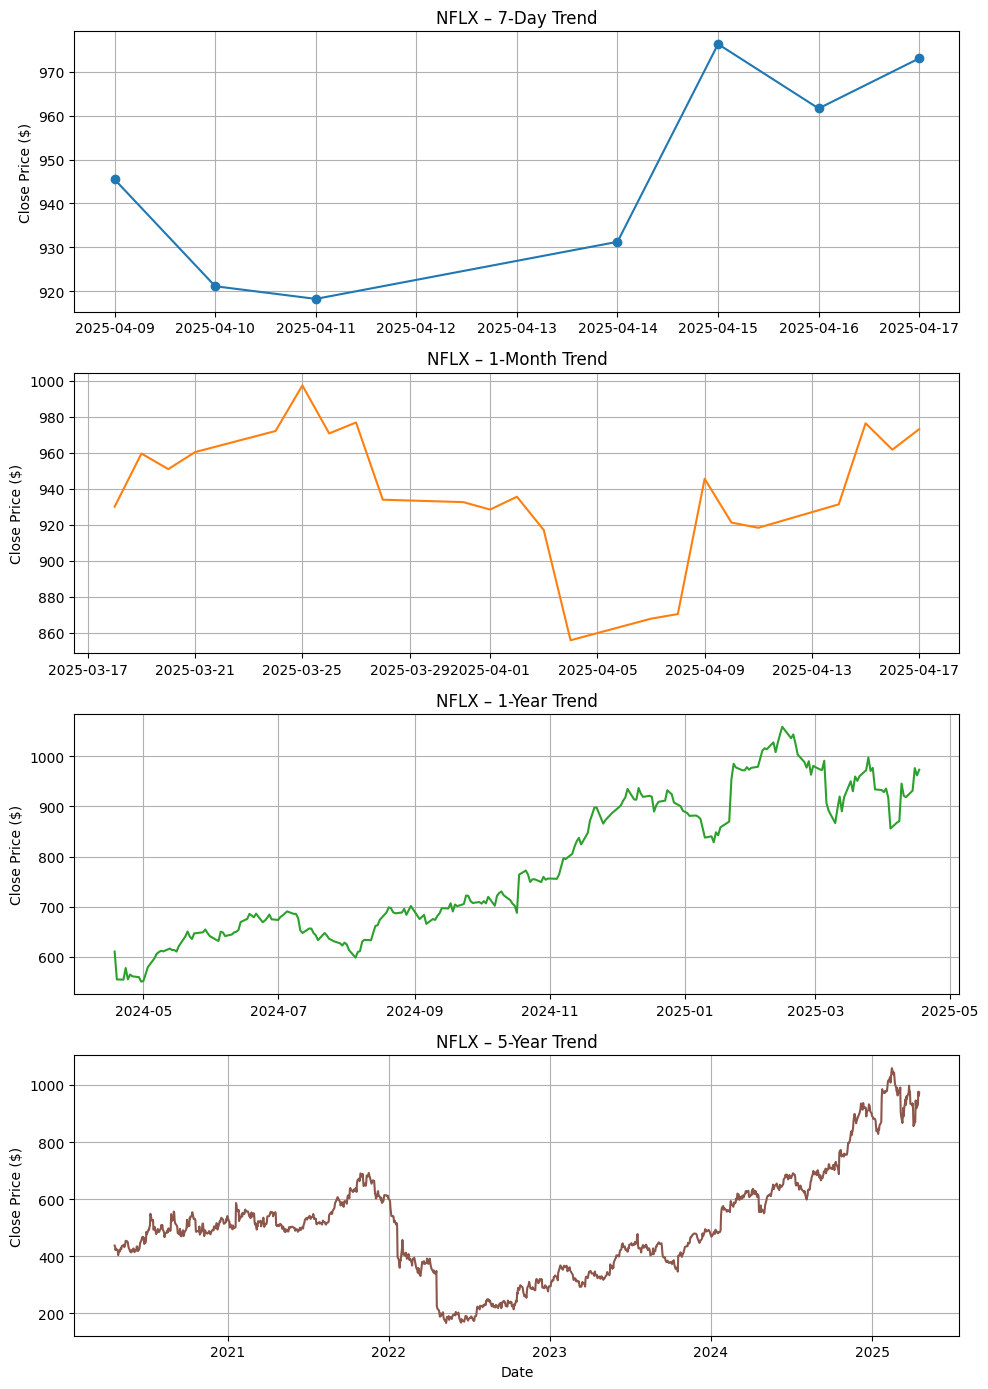

Trend plot saved to: NFLX_stock_trend_plot.png


In [13]:
import matplotlib.pyplot as plt

def plot_stock_trends(ticker="NFLX", save_path="NFLX_stock_trend_plot.png"):
    stock = yf.Ticker(ticker)

    # Fetch historical data
    data_7d = stock.history(period="7d")
    data_1mo = stock.history(period="1mo")
    data_1y = stock.history(period="1y")
    data_5y = stock.history(period="5y")

    # Create subplots (4 rows)
    fig, axes = plt.subplots(4, 1, figsize=(10, 14), sharey=False)

    # Plot 7-Day
    axes[0].plot(data_7d.index, data_7d["Close"], color="#1f77b4", marker='o')
    axes[0].set_title(f"{ticker} – 7-Day Trend")
    axes[0].set_ylabel("Close Price ($)")
    axes[0].grid(True)

    # Plot 1-Month
    axes[1].plot(data_1mo.index, data_1mo["Close"], color="#ff7f0e")
    axes[1].set_title(f"{ticker} – 1-Month Trend")
    axes[1].set_ylabel("Close Price ($)")
    axes[1].grid(True)

    # Plot 1-Year
    axes[2].plot(data_1y.index, data_1y["Close"], color="#2ca02c")
    axes[2].set_title(f"{ticker} – 1-Year Trend")
    axes[2].set_ylabel("Close Price ($)")
    axes[2].grid(True)

    # Plot 5-Year
    axes[3].plot(data_5y.index, data_5y["Close"], color="#8c564b")
    axes[3].set_title(f"{ticker} – 5-Year Trend")
    axes[3].set_xlabel("Date")
    axes[3].set_ylabel("Close Price ($)")
    axes[3].grid(True)

    # Save the figure
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"Trend plot saved to: {save_path}")

plot_stock_trends(ticker="NFLX", save_path="NFLX_stock_trend_plot.png")

In [14]:
import google.generativeai as genai
from PIL import Image

# Load your chart image
def analyze_trend_image_with_gemini(image_path, ticker):
    img = Image.open(image_path)

    prompt = f"""
You are an expert financial analyst AI. Analyze the stock trend chart below for {ticker}. 
Please describe in detail:
- The observed trend and changes over time
- Any key insights, reversals, volatility, or patterns
- Your general impression of the stock's behavior based solely on the visual chart

Finally, based on the chart pattern alone, what is your suggestion for investors?
"""


    prompt = [prompt, img]

    response = client.models.generate_content(
    model='gemini-2.0-flash', ##gemini-2.5-pro-exp-03-25 gemini-2.0-flash gemini-1.5-flash
    contents=prompt)
    
    return response.text.strip()

#stock_data = get_stock_info("NFLX")  # Or any ticker
result = analyze_trend_image_with_gemini("NFLX_stock_trend_plot.png", "NFLX")

display(Markdown(result))

Okay, let's analyze the Netflix (NFLX) stock trend based on the provided charts.

**Analysis:**

*   **7-Day Trend:** The very short-term trend (last 7 days) shows a dip followed by a significant upward surge. The price starts at approximately $945, drops to around $920, then experiences a sharp increase, peaking above $970 before settling around $972. This suggests strong positive momentum in the immediate short term.

*   **1-Month Trend:** This shows more volatility. The price fluctuates significantly throughout the month. The month starts around $930 and goes as high as 990, dips sharply down to ~$860 at one point and then recovers and rises again. The last week in particular seems to have some gains.

*   **1-Year Trend:** The one-year trend shows a generally upward trajectory. The stock started around $600 in early 2024 and has been steadily climbing towards a high around $1050 by early 2025. There's some pullback towards the end of the period, but the overall direction has been positive.

*   **5-Year Trend:** This chart presents a longer-term perspective, revealing a more complex pattern. From 2020 to 2022, the stock experiences peaks and valleys, including a notable drop in 2022. After 2022 there is a growth to another peak in 2025. Overall it's an upwards trend over a 5 year span.

**Key Insights, Reversals, Volatility, and Patterns:**

*   **Volatility:**  The 1-month trend highlights short-term volatility, indicating that the stock price can be subject to rapid changes.
*   **Long-Term Growth:** The 1-year and 5-year charts suggest a broader trend of long-term growth, despite occasional dips and periods of consolidation.
*   **Recent Momentum:** The 7-day trend points towards a recent surge in positive sentiment or performance.

**General Impression:**

Based on these charts alone, Netflix stock appears to be in a generally healthy, growing phase. While there are periods of volatility and occasional pullbacks, the overall trend is upward, especially when looking at the longer-term perspective. The recent surge in the 7-day trend indicates current positive momentum.

**Investment Suggestion (Based solely on the chart pattern):**

Given the upward trends over the past year and the strong recent momentum, the following suggestion is reasonable **with the significant caveat that this is based *solely* on the chart patterns provided and *not* on any fundamental analysis or other external factors:**

**Suggestion: Consider a "Buy" or "Hold" strategy.**

*   **For those already holding the stock:** Given the generally upward trend, it is a good idea to maintain the position, especially for investors with a long-term view.

*   **For those not currently holding the stock:** the stock looks to be trending upwards and has a good trajectory overall. So considering investing now may be a good opportunity. However the 1-Month trend has lots of volatility, so care should be taken with this stock to avoid losses.

**Disclaimer:** This analysis is based solely on the visual chart provided and should not be considered financial advice. You should conduct your own research and consult with a qualified financial advisor before making any investment decisions.

## Querying Gemini for Recommendation with Stock Metirc Data

In [15]:
# Run Full Pipeline for a Ticker
log_stock_recommendation(ticker="NFLX", excel_path="stock_recommendations_log.csv")

Fetching stock info for NFLX...

Stock data:
{
  "ticker": "NFLX",
  "current_price": 973.03,
  "52_week_high": 1064.5,
  "52_week_low": 542.01,
  "day_high": 984.7015,
  "day_low": 956.0,
  "volume": 8893735,
  "market_cap": 416220413952,
  "sector": "Communication Services",
  "pe_ratio": 46.09332,
  "dividend_yield": null,
  "beta": 1.547,
  "fifty_day_avg": 959.2258,
  "two_hundred_day_avg": 819.33887,
  "price_to_book": 17.238247,
  "eps": 21.11,
  "ytd_return": null,
  "recent_trend": [
    945.47,
    921.17,
    918.29,
    931.28,
    976.28,
    961.63,
    973.03
  ]
}



**Recommendation:** HOLD  
**Confidence:** Medium  
**Reason:** The price is trading near its 52-week high with positive momentum above both the 50-day and 200-day moving averages. However, a high P/E ratio and Price-to-Book suggest it may be overvalued.



Saved log entry to: stock_recommendations_log.csv


# GenAI Capability 4: Summarize Each Recent Stock News Article

This step leverages GenAI’s **document-level understanding** to individually process and summarize recent news articles related to the selected stock. Each article is first extracted from its source link using web scraping, then passed to Gemini with a focused prompt asking for 2–3 investor-relevant insights.

The result is a collection of concise summaries that highlight the key takeaways from each article. These summaries help surface sentiment, trends, or risks mentioned in the media—providing structured context for later financial analysis.

This capability demonstrates how GenAI can digest long-form financial content into actionable insights, article by article.


In [16]:
from newspaper import Article

def extract_article_text(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text.strip()
    except Exception as e:
        print(f"Failed to extract article: {url}\nError: {e}")
        return None


In [17]:
def summarize_articles_with_gemini(news_items, ticker, max_articles=3):
    summaries = []
    
    for item in news_items[:max_articles]:
        text = extract_article_text(item["link"])
        if not text:
            continue
        
        prompt = f"""Summarize the following article related to {ticker} into 2–3 investor-relevant insights:\n\n{text}"""
        
        response = client.models.generate_content(
        model='gemini-2.0-flash', ##gemini-2.5-pro-exp-03-25 gemini-2.0-flash gemini-1.5-flash gemini-2.0-pro-exp
        #config=types.GenerateContentConfig(
            #response_mime_type="application/json",
        #),
        contents=prompt)

        
        summaries.append({
            "title": item["title"],
            "publisher": item.get("publisher", "Unknown"),
            "url": item["link"],
            "date": datetime.fromtimestamp(item["providerPublishTime"]).strftime("%Y-%m-%d"),
            "summary": response.text.strip()
        })
    
    return summaries


## Querying Gemini for Each Article Summary...

In [18]:
news = yf.Search("NFLX", news_count=5).news
summaries_each_news = summarize_articles_with_gemini(news, "NFLX", max_articles=5)

for s in summaries_each_news:
    print(f"📌 {s['title']} ({s['publisher']} {s['date']})\n→ {s['summary']}\n")


📌 Dow Jones Futures Fall With Trump Tariffs, Earnings In Focus; Tesla Reportedly Delays New EV (Investor's Business Daily 2025-04-20)
→ Since there's no article provided, I can't summarize it. However, I can provide you with general investor-relevant insights about Netflix (NFLX) based on common knowledge and recent trends in the streaming industry:

**Here are 2-3 potential investor-relevant insights about Netflix (NFLX), assuming no specific news events are happening:**

1.  **Subscriber Growth & Global Expansion Remain Key:** While Netflix's North American market is maturing, continued international subscriber growth, particularly in Asia-Pacific and emerging markets, is crucial for long-term revenue and profitability. Monitor subscriber acquisition costs (CAC) in these regions and the effectiveness of localization strategies.

2.  **Content Strategy & Original Programming are Vital:** Netflix's competitive advantage hinges on its ability to create compelling original content that a

# GenAI Capability 5: Document Understanding with Multi-Source Reasoning

In this step, this showcase **multi-source reasoning** by combining all previously summarized stock news with structured stock data (such as price trends, P/E ratio, volume, and moving averages). These two data types—unstructured text and structured financial metrics—are provided to Gemini in a single, unified prompt.

The model processes this holistic input to deliver:
- A high-level summary of market sentiment and recent events
- A recommendation to **BUY**, **HOLD**, or **SELL**
- A rationale behind the recommendation

This demonstrates the power of GenAI to synthesize diverse inputs and generate context-aware investment advice—mimicking the decision-making approach of a professional financial advisor.

In [19]:
SUMMARY_PROMPT = """\
# Instruction
You are an expert finance advisor. Your task is to analyze the {ticker} stock trend. 
We will provide you with the recent news articles and stock data for your analysis.
You should summarize the following article(s) and stock data related to {ticker} into 2–3 investor-relevant insights. 
Then you should suggest one of the following actions: BUY, HOLD, or SELL. 

Now analyze:
Article Input:
{input_article}

Stock Data Input:
{input_stock}

Expected Output Format:
Insights:

1. ...
2. ...
3. ...

Action: BUY | HOLD | SELL
Confidence: Low | Medium | High
Reason: ...
"""

def get_news_insight_and_recommendation(news_items, ticker):
    formatted_news = "\n\n".join([
        f"Title: {n['title']}\nDate: {n['date']}\nPublisher: {n['publisher']}\nURL: {n['url']}\nSummary: {n['summary']}"
        for n in news_items
    ])

    stock_data = get_stock_info(ticker)
    
    prompt = SUMMARY_PROMPT.format(ticker=ticker, 
                                   input_article=formatted_news,
                                   input_stock=json.dumps(stock_data, indent=2))

    response = client.models.generate_content(
        model='gemini-2.0-flash', ##gemini-2.5-pro-exp-03-25 gemini-2.0-flash gemini-1.5-flash
        #config=types.GenerateContentConfig(
            #response_mime_type="application/json",
        #),
        contents=prompt)
    
    return response.text.strip()


In [20]:
summaries_action = get_news_insight_and_recommendation(summaries_each_news, "NFLX")

## Querying Gemini for Multi-Source Summary...

In [21]:
formatted_action = summaries_action.replace("Action:", "**Action:**") \
                             .replace("Confidence:", "\n**Confidence:**") \
                             .replace("Reason:", "\n**Reason:**")

display(Markdown(formatted_action))

Insights:

1.  **Strong Growth Trajectory and Positive Earnings Momentum:** Multiple sources highlight Netflix's robust growth in subscribers, revenue, and operating income, with potential for further expansion driven by its advertising tier and international markets. The company's Q1 earnings exceeded expectations, and its outlook remains positive, indicating a sustained ability to grow revenue and earnings.
2.  **Ambitious Growth Targets and Diversification Efforts:** Netflix's aim to reach a $1 trillion market cap by 2030 underscores its commitment to aggressive growth. Its strategies to achieve this goal include international expansion, ad revenue growth, and diversification of content offerings (live events, WWE, original programming). The company is positioned to capitalize on the growing advertising market and reduce reliance on subscription fees alone.
3.  **Valuation Considerations:** While the stock has already experienced significant gains, it is still trading below its 52-week high. The stock's PE ratio is elevated, and the price is above its 50 day and 200 day moving average, but analyst expectations may be conservative given Netflix's historical performance of exceeding expectations.

**Action:** BUY

**Confidence:** Medium

**Reason:** The combination of strong growth momentum, ambitious targets, successful diversification efforts, and positive earnings momentum makes Netflix an attractive investment despite its already high price. Although the PE ratio is high, the stock price is still below its 52 week high and forecasts for revenue growth indicate continued share price growth.

# Disclaimer
This project is for educational purposes only and does not constitute financial advice. Any stock recommendations made by the AI are generated for demonstration and should not be used for real investment decisions.